# Exercise 13: Mining Frequent Patterns from Air Pollution Data (Google Collab)
s1292001
Github repository:
https://github.com/A-zu/s1292001_PAMI

First, the data is loaded into a dataframe

In [42]:
import pandas as pd

dataset = pd.read_csv("airPollutionData.csv")
dataset.head()

,Timestamp,POINT(128.1779451 26.7456488),POINT(128.8409418 32.6954809),POINT(128.8460344 32.6989579),POINT(129.2857639 34.2426737),POINT(129.289686 34.2102138),POINT(129.6669321 33.1948696),POINT(129.6750369 32.9215763),POINT(129.691157 33.7505959),POINT(129.715007 33.3457306),...,POINT(141.9498839 39.6442869),POINT(142.2151268 27.0960623),POINT(142.3294024 43.7940457),POINT(142.3645743 43.7702998),POINT(142.3964685 43.7482619),POINT(142.4360185 43.8107633),POINT(143.1960911 42.9239722),POINT(143.8907183 43.7987008),POINT(144.2606979 43.0173372),POINT(144.3636328 43.0214076)
0,2024-06-01 01:00:00,NaN,NaN,8.0,11.0,17.0,NaN,7.0,8.0,8.0,...,10.0,NaN,3.0,4.0,4.0,3.0,-1.0,3.0,NaN,4.0
1,2024-06-01 02:00:00,NaN,NaN,10.0,10.0,12.0,NaN,4.0,6.0,8.0,...,9.0,NaN,3.0,2.0,4.0,2.0,4.0,3.0,NaN,3.0
2,2024-06-01 03:00:00,NaN,NaN,8.0,11.0,9.0,NaN,0.0,8.0,7.0,...,10.0,NaN,3.0,2.0,7.0,4.0,2.0,4.0,NaN,3.0
3,2024-06-01 04:00:00,NaN,NaN,9.0,10.0,6.0,NaN,6.0,8.0,9.0,...,5.0,NaN,6.0,2.0,5.0,2.0,3.0,3.0,NaN,1.0
4,2024-06-01 05:00:00,NaN,NaN,9.0,9.0,12.0,NaN,6.0,7.0,11.0,...,4.0,NaN,5.0,3.0,6.0,3.0,4.0,2.0,NaN,2.0


## Data pre-processing
### Step 1:
Removing the timestamp column


In [43]:
dataset.drop(columns=["Timestamp"], inplace=True)
dataset.head()

,POINT(128.1779451 26.7456488),POINT(128.8409418 32.6954809),POINT(128.8460344 32.6989579),POINT(129.2857639 34.2426737),POINT(129.289686 34.2102138),POINT(129.6669321 33.1948696),POINT(129.6750369 32.9215763),POINT(129.691157 33.7505959),POINT(129.715007 33.3457306),POINT(129.7157996 33.1804356),...,POINT(141.9498839 39.6442869),POINT(142.2151268 27.0960623),POINT(142.3294024 43.7940457),POINT(142.3645743 43.7702998),POINT(142.3964685 43.7482619),POINT(142.4360185 43.8107633),POINT(143.1960911 42.9239722),POINT(143.8907183 43.7987008),POINT(144.2606979 43.0173372),POINT(144.3636328 43.0214076)
0,NaN,NaN,8.0,11.0,17.0,NaN,7.0,8.0,8.0,6.0,...,10.0,NaN,3.0,4.0,4.0,3.0,-1.0,3.0,NaN,4.0
1,NaN,NaN,10.0,10.0,12.0,NaN,4.0,6.0,8.0,7.0,...,9.0,NaN,3.0,2.0,4.0,2.0,4.0,3.0,NaN,3.0
2,NaN,NaN,8.0,11.0,9.0,NaN,0.0,8.0,7.0,8.0,...,10.0,NaN,3.0,2.0,7.0,4.0,2.0,4.0,NaN,3.0
3,NaN,NaN,9.0,10.0,6.0,NaN,6.0,8.0,9.0,8.0,...,5.0,NaN,6.0,2.0,5.0,2.0,3.0,3.0,NaN,1.0
4,NaN,NaN,9.0,9.0,12.0,NaN,6.0,7.0,11.0,8.0,...,4.0,NaN,5.0,3.0,6.0,3.0,4.0,2.0,NaN,2.0


### Step 2:
Removing Sensors with no Point information

In [44]:
sensorsWithPointInformation = [col for col in dataset if 'Unnamed' in col]
dataset.drop(columns=sensorsWithPointInformation, inplace=True, axis=1)
dataset.head()

,POINT(128.1779451 26.7456488),POINT(128.8409418 32.6954809),POINT(128.8460344 32.6989579),POINT(129.2857639 34.2426737),POINT(129.289686 34.2102138),POINT(129.6669321 33.1948696),POINT(129.6750369 32.9215763),POINT(129.691157 33.7505959),POINT(129.715007 33.3457306),POINT(129.7157996 33.1804356),...,POINT(141.9498839 39.6442869),POINT(142.2151268 27.0960623),POINT(142.3294024 43.7940457),POINT(142.3645743 43.7702998),POINT(142.3964685 43.7482619),POINT(142.4360185 43.8107633),POINT(143.1960911 42.9239722),POINT(143.8907183 43.7987008),POINT(144.2606979 43.0173372),POINT(144.3636328 43.0214076)
0,NaN,NaN,8.0,11.0,17.0,NaN,7.0,8.0,8.0,6.0,...,10.0,NaN,3.0,4.0,4.0,3.0,-1.0,3.0,NaN,4.0
1,NaN,NaN,10.0,10.0,12.0,NaN,4.0,6.0,8.0,7.0,...,9.0,NaN,3.0,2.0,4.0,2.0,4.0,3.0,NaN,3.0
2,NaN,NaN,8.0,11.0,9.0,NaN,0.0,8.0,7.0,8.0,...,10.0,NaN,3.0,2.0,7.0,4.0,2.0,4.0,NaN,3.0
3,NaN,NaN,9.0,10.0,6.0,NaN,6.0,8.0,9.0,8.0,...,5.0,NaN,6.0,2.0,5.0,2.0,3.0,3.0,NaN,1.0
4,NaN,NaN,9.0,9.0,12.0,NaN,6.0,7.0,11.0,8.0,...,4.0,NaN,5.0,3.0,6.0,3.0,4.0,2.0,NaN,2.0


### Step 3:
Replacing NaN values with 0

In [45]:
dataset.fillna(0, inplace=True)
dataset.head()

,POINT(128.1779451 26.7456488),POINT(128.8409418 32.6954809),POINT(128.8460344 32.6989579),POINT(129.2857639 34.2426737),POINT(129.289686 34.2102138),POINT(129.6669321 33.1948696),POINT(129.6750369 32.9215763),POINT(129.691157 33.7505959),POINT(129.715007 33.3457306),POINT(129.7157996 33.1804356),...,POINT(141.9498839 39.6442869),POINT(142.2151268 27.0960623),POINT(142.3294024 43.7940457),POINT(142.3645743 43.7702998),POINT(142.3964685 43.7482619),POINT(142.4360185 43.8107633),POINT(143.1960911 42.9239722),POINT(143.8907183 43.7987008),POINT(144.2606979 43.0173372),POINT(144.3636328 43.0214076)
0,0.0,0.0,8.0,11.0,17.0,0.0,7.0,8.0,8.0,6.0,...,10.0,0.0,3.0,4.0,4.0,3.0,-1.0,3.0,0.0,4.0
1,0.0,0.0,10.0,10.0,12.0,0.0,4.0,6.0,8.0,7.0,...,9.0,0.0,3.0,2.0,4.0,2.0,4.0,3.0,0.0,3.0
2,0.0,0.0,8.0,11.0,9.0,0.0,0.0,8.0,7.0,8.0,...,10.0,0.0,3.0,2.0,7.0,4.0,2.0,4.0,0.0,3.0
3,0.0,0.0,9.0,10.0,6.0,0.0,6.0,8.0,9.0,8.0,...,5.0,0.0,6.0,2.0,5.0,2.0,3.0,3.0,0.0,1.0
4,0.0,0.0,9.0,9.0,12.0,0.0,6.0,7.0,11.0,8.0,...,4.0,0.0,5.0,3.0,6.0,3.0,4.0,2.0,0.0,2.0


### Step 4:
Changing the columns to first character capitalized, lowercase format

In [46]:
dataset.columns = [x.capitalize() for x in dataset.columns]
dataset.head()

,Point(128.1779451 26.7456488),Point(128.8409418 32.6954809),Point(128.8460344 32.6989579),Point(129.2857639 34.2426737),Point(129.289686 34.2102138),Point(129.6669321 33.1948696),Point(129.6750369 32.9215763),Point(129.691157 33.7505959),Point(129.715007 33.3457306),Point(129.7157996 33.1804356),...,Point(141.9498839 39.6442869),Point(142.2151268 27.0960623),Point(142.3294024 43.7940457),Point(142.3645743 43.7702998),Point(142.3964685 43.7482619),Point(142.4360185 43.8107633),Point(143.1960911 42.9239722),Point(143.8907183 43.7987008),Point(144.2606979 43.0173372),Point(144.3636328 43.0214076)
0,0.0,0.0,8.0,11.0,17.0,0.0,7.0,8.0,8.0,6.0,...,10.0,0.0,3.0,4.0,4.0,3.0,-1.0,3.0,0.0,4.0
1,0.0,0.0,10.0,10.0,12.0,0.0,4.0,6.0,8.0,7.0,...,9.0,0.0,3.0,2.0,4.0,2.0,4.0,3.0,0.0,3.0
2,0.0,0.0,8.0,11.0,9.0,0.0,0.0,8.0,7.0,8.0,...,10.0,0.0,3.0,2.0,7.0,4.0,2.0,4.0,0.0,3.0
3,0.0,0.0,9.0,10.0,6.0,0.0,6.0,8.0,9.0,8.0,...,5.0,0.0,6.0,2.0,5.0,2.0,3.0,3.0,0.0,1.0
4,0.0,0.0,9.0,9.0,12.0,0.0,6.0,7.0,11.0,8.0,...,4.0,0.0,5.0,3.0,6.0,3.0,4.0,2.0,0.0,2.0


### Step 5:
Removing abnormal values in the data

In [47]:
dataset.where(dataset < 100, 0, inplace=True) # Get rid of values greater or equal to 100
dataset.where(dataset > 0, 0, inplace=True) # Get rid of negative values
dataset.head()

,Point(128.1779451 26.7456488),Point(128.8409418 32.6954809),Point(128.8460344 32.6989579),Point(129.2857639 34.2426737),Point(129.289686 34.2102138),Point(129.6669321 33.1948696),Point(129.6750369 32.9215763),Point(129.691157 33.7505959),Point(129.715007 33.3457306),Point(129.7157996 33.1804356),...,Point(141.9498839 39.6442869),Point(142.2151268 27.0960623),Point(142.3294024 43.7940457),Point(142.3645743 43.7702998),Point(142.3964685 43.7482619),Point(142.4360185 43.8107633),Point(143.1960911 42.9239722),Point(143.8907183 43.7987008),Point(144.2606979 43.0173372),Point(144.3636328 43.0214076)
0,0.0,0.0,8.0,11.0,17.0,0.0,7.0,8.0,8.0,6.0,...,10.0,0.0,3.0,4.0,4.0,3.0,0.0,3.0,0.0,4.0
1,0.0,0.0,10.0,10.0,12.0,0.0,4.0,6.0,8.0,7.0,...,9.0,0.0,3.0,2.0,4.0,2.0,4.0,3.0,0.0,3.0
2,0.0,0.0,8.0,11.0,9.0,0.0,0.0,8.0,7.0,8.0,...,10.0,0.0,3.0,2.0,7.0,4.0,2.0,4.0,0.0,3.0
3,0.0,0.0,9.0,10.0,6.0,0.0,6.0,8.0,9.0,8.0,...,5.0,0.0,6.0,2.0,5.0,2.0,3.0,3.0,0.0,1.0
4,0.0,0.0,9.0,9.0,12.0,0.0,6.0,7.0,11.0,8.0,...,4.0,0.0,5.0,3.0,6.0,3.0,4.0,2.0,0.0,2.0


## Installing PAMI

In [48]:
!pip install -U PAMI

## Data transformation
Converting the data frame into a transactional database

In [49]:
from PAMI.extras.DF2DB import DenseFormatDF as db

filename = 'PM24HeavyPollutionRecordingSensors.csv'

obj = db.DenseFormatDF(dataset)
obj.convert2TransactionalDatabase(filename, '>=', 15)

## Data Mining

Database size (total no of transactions) : 720
Number of items : 1073
Minimum Transaction Size : 1
Average Transaction Size : 144.97916666666666
Maximum Transaction Size : 706
Standard Deviation Transaction Size : 151.67913267221184
Variance in Transaction Sizes : 23038.557284422808
Sparsity : 0.8648842808325566


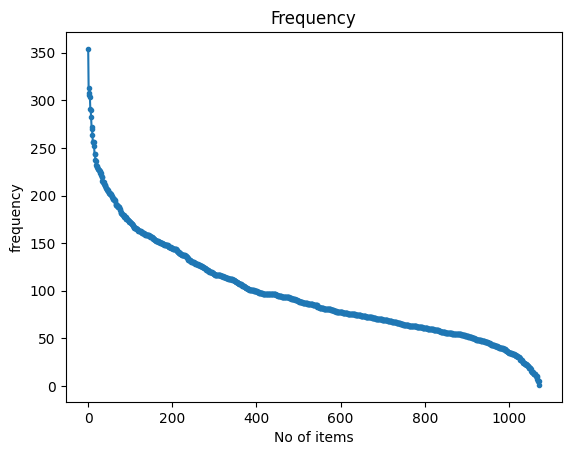

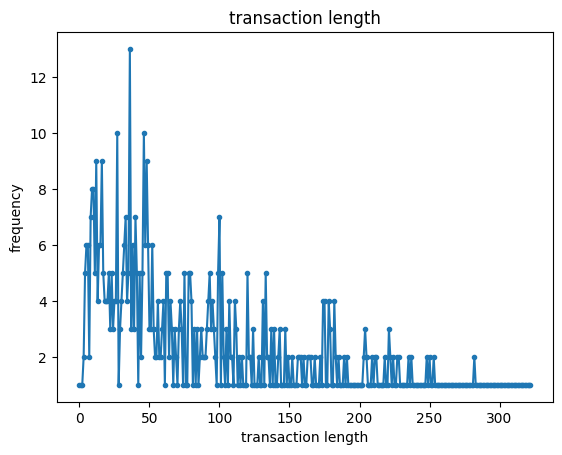

In [50]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase(filename)
obj.run()
obj.printStats()
obj.plotGraphs()

In [51]:
from PAMI.frequentPattern.basic import FPGrowth as ab

minSup=150
obj = ab.FPGrowth(filename, minSup)
obj.mine()
obj.printResults()
obj.save('frequentPatterns.txt')

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total number of Frequent Patterns: 779
Total Memory in USS: 353562624
Total Memory in RSS 370946048
Total ExecutionTime in ms: 1.5116190910339355


## Visualizing the results

In [52]:
from PAMI.extras.graph import visualizePatterns as fig

obj = fig.visualizePatterns('frequentPatterns.txt', 20)
obj.visualize(width=1000,height=900)

Number 	 Pattern
2	Point(133.5860325 33.9921791)	Point(133.4605487 34.4942837)	Point(133.1917875 33.9177615)	Point(133.0801232 33.9316927)
3	Point(133.5860325 33.9921791)	Point(133.4605487 34.4942837)	Point(133.5500676 33.9810411)	Point(133.0801232 33.9316927)
4	Point(133.5860325 33.9921791)	Point(133.2804705 33.9321902)	Point(133.5500676 33.9810411)	Point(133.1917875 33.9177615)
5	Point(133.5860325 33.9921791)	Point(133.2804705 33.9321902)	Point(133.5500676 33.9810411)	Point(133.0801232 33.9316927)
6	Point(133.5860325 33.9921791)	Point(133.2804705 33.9321902)	Point(133.0801232 33.9316927)	Point(133.1917875 33.9177615)
7	Point(133.5860325 33.9921791)	Point(133.1917875 33.9177615)	Point(133.5500676 33.9810411)	Point(133.0801232 33.9316927)
8	Point(133.5500676 33.9810411)	Point(133.2804705 33.9321902)	Point(133.4605487 34.4942837)	Point(133.0801232 33.9316927)
9	Point(133.5500676 33.9810411)	Point(133.2804705 33.9321902)	Point(133.4605487 34.4942837)	Point(133.1917875 33.9177615)
10	Poin